In [57]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [59]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [60]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [61]:
neighborhoods_data = newyork_data['features']

In [62]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [63]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [64]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [65]:
neigh_brooklyn = neighborhoods[neighborhoods['Borough']== 'Brooklyn'].reset_index(drop=True)

In [66]:
neigh_brooklyn.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


#### Use geopy library to get the latitude and longitude values of Brooklyn.

In [67]:
address = 'Brooklyn'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


I used the folium python library to visualize the geographic details of Brooklyn and its neighborhoods and created a map of Brooklyn with neighborhoods overlaid. I used the latitude and longitude values to get the visual as below

In [68]:
# create map of New York using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neigh_brooklyn['Latitude'], neigh_brooklyn['Longitude'], neigh_brooklyn['Borough'], neigh_brooklyn['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [69]:
CLIENT_ID = 'VSWYCOROKCR3LF15JKRDYIAQXCKLFWYOEMDHBEM0ALMGDITW' # your Foursquare ID
CLIENT_SECRET = 'UTH3ECR4R0ZTI0CMOBGS1WE1NXLVYY0X4DLMEH1TQDW3DKQF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VSWYCOROKCR3LF15JKRDYIAQXCKLFWYOEMDHBEM0ALMGDITW
CLIENT_SECRET:UTH3ECR4R0ZTI0CMOBGS1WE1NXLVYY0X4DLMEH1TQDW3DKQF


In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:

brooklyn_venues = getNearbyVenues(names=neigh_brooklyn['Neighborhood'],
                                   latitudes=neigh_brooklyn['Latitude'],
                                   longitudes=neigh_brooklyn['Longitude']
                                  )



Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [72]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2773, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar


## Only filter the places that have been inspected

In [73]:
# IMPORT DATASET FROM ALL PLACES INSPECT 
brooky_inspection  = pd.read_csv("brookly_info.csv",sep = ';')

In [74]:

brooky_inspection.shape

(100918, 26)

In [75]:
brooky_inspection.rename(columns = {'DBA':'Venue'}, inplace = True)

In [76]:
merge_data = pd.merge(brooklyn_venues,brooky_inspection, on='Venue')

In [77]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3852 entries, 0 to 3851
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            3852 non-null   object 
 1   Neighborhood Latitude   3852 non-null   float64
 2   Neighborhood Longitude  3852 non-null   float64
 3   Venue                   3852 non-null   object 
 4   Venue Latitude          3852 non-null   float64
 5   Venue Longitude         3852 non-null   float64
 6   Venue Category          3852 non-null   object 
 7   CAMIS                   3852 non-null   int64  
 8   BORO                    3852 non-null   object 
 9   BUILDING                3852 non-null   object 
 10  STREET                  3852 non-null   object 
 11  ZIPCODE                 3852 non-null   int64  
 12  PHONE                   3852 non-null   object 
 13  CUISINE DESCRIPTION     3852 non-null   object 
 14  INSPECTION DATE         3852 non-null   

In [78]:
merge_data.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,CAMIS,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
3847,Dumbo,40.703176,-73.988753,Brooklyn Roasting Company,40.702916,-73.989452,Coffee Shop,50059322,Brooklyn,63,FLUSHING AVENUE,11205,7188551000,Café/Coffee/Tea,04/10/2018,Violations were cited in the following area(s).,03A,Food from unapproved or unknown source or home...,Y,12.0,A,04/10/2018,08/05/2020,Cycle Inspection / Initial Inspection,40.698013,-73.974986,302.0,33.0,54300.0,3335129.0,3.020230e+09,BK99
3848,Dumbo,40.703176,-73.988753,Brooklyn Roasting Company,40.702916,-73.989452,Coffee Shop,50059322,Brooklyn,63,FLUSHING AVENUE,11205,7188551000,Café/Coffee/Tea,03/31/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,03/31/2017,08/05/2020,Pre-permit (Operational) / Initial Inspection,40.698013,-73.974986,302.0,33.0,54300.0,3335129.0,3.020230e+09,BK99
3849,Dumbo,40.703176,-73.988753,Brooklyn Roasting Company,40.702916,-73.989452,Coffee Shop,50059322,Brooklyn,63,FLUSHING AVENUE,11205,7188551000,Café/Coffee/Tea,04/01/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,12.0,A,04/01/2019,08/05/2020,Cycle Inspection / Initial Inspection,40.698013,-73.974986,302.0,33.0,54300.0,3335129.0,3.020230e+09,BK99
3850,Dumbo,40.703176,-73.988753,Brooklyn Roasting Company,40.702916,-73.989452,Coffee Shop,50059322,Brooklyn,63,FLUSHING AVENUE,11205,7188551000,Café/Coffee/Tea,04/10/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,04/10/2018,08/05/2020,Cycle Inspection / Initial Inspection,40.698013,-73.974986,302.0,33.0,54300.0,3335129.0,3.020230e+09,BK99
3851,Dumbo,40.703176,-73.988753,Brooklyn Roasting Company,40.702916,-73.989452,Coffee Shop,50059322,Brooklyn,63,FLUSHING AVENUE,11205,7188551000,Café/Coffee/Tea,04/01/2019,Violations were cited in the following area(s).,03A,Food from unapproved or unknown source or home...,Y,12.0,A,04/01/2019,08/05/2020,Cycle Inspection / Initial Inspection,40.698013,-73.974986,302.0,33.0,54300.0,3335129.0,3.020230e+09,BK99


## *Cleaning data*

In [79]:
work_data = merge_data[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','Venue Latitude','Venue Longitude','Venue Category']].reset_index(drop=True)
work_data.rename(columns = {'Venue Latitude':'Latitude','Venue Longitude':'Longitude'}, inplace = True)
work_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,Latitude,Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,XIN,04N,Filth flies or food/refuse/sewage-associated (...,Y,40.625082,-74.030494,Chinese Restaurant
1,Bay Ridge,40.625801,-74.030621,XIN,06C,Food not protected from potential source of co...,Y,40.625082,-74.030494,Chinese Restaurant
2,Bay Ridge,40.625801,-74.030621,XIN,09A,Canned food product observed dented and not se...,N,40.625082,-74.030494,Chinese Restaurant
3,Bay Ridge,40.625801,-74.030621,XIN,10H,Proper sanitization not provided for utensil w...,N,40.625082,-74.030494,Chinese Restaurant
4,Bay Ridge,40.625801,-74.030621,XIN,04H,"Raw, cooked or prepared food is adulterated, c...",Y,40.625082,-74.030494,Chinese Restaurant


In [80]:
print('There are {} uniques violation code.'.format(len(work_data['VIOLATION CODE'].unique())))

There are 55 uniques violation code.


let's delete the lines with the missing values

In [81]:
work_data.isnull().sum()

Neighborhood               0
Neighborhood Latitude      0
Neighborhood Longitude     0
Venue                      0
VIOLATION CODE            33
VIOLATION DESCRIPTION     39
CRITICAL FLAG             39
Latitude                   0
Longitude                  0
Venue Category             0
dtype: int64

In [82]:
work_data = work_data.dropna()
work_data.reset_index(drop= True)
work_data.isnull().sum()

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
VIOLATION CODE            0
VIOLATION DESCRIPTION     0
CRITICAL FLAG             0
Latitude                  0
Longitude                 0
Venue Category            0
dtype: int64

In [83]:
work_data['CRITICAL FLAG'].replace({"Y": True, "N": False }, inplace=True)

In [84]:
# *Exploratory Data Analysis*

I visualized Brooklyn neighborhoods based on the number of code violations recorded

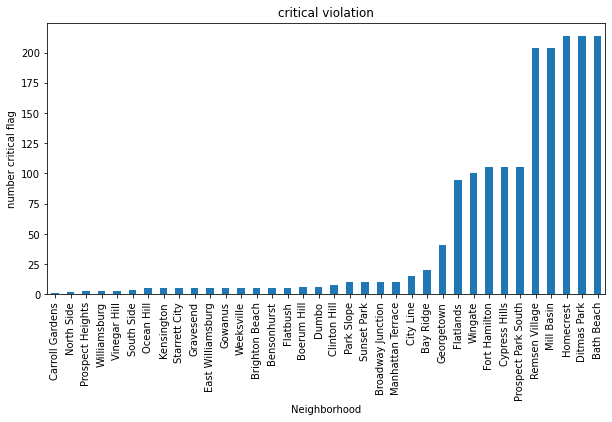

In [85]:
critical_flag = work_data.set_index("Neighborhood")
critical_flag = critical_flag[critical_flag['CRITICAL FLAG']== True ]
critical_flag = critical_flag.groupby('Neighborhood')['CRITICAL FLAG'].count().sort_values()
critical_flag.plot(kind = 'bar',figsize=(10, 5))
plt.ylabel('number critical flag')
plt.title('critical violation')
#plt.bar(critical_flag,critical_flag["Neighborhood"])
plt.show()

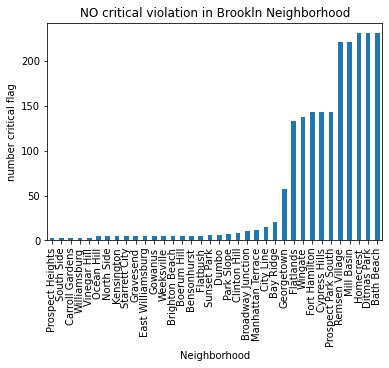

In [86]:
###work_data['CRITICAL FLAG'].replace({"Y": True, "b": False }, inplace=True)
critical_noflag = work_data.set_index("Neighborhood")
critical_noflag = critical_noflag[critical_noflag['CRITICAL FLAG']== False ]
critical_noflag = critical_noflag.groupby('Neighborhood')['CRITICAL FLAG'].count().sort_values()
critical_noflag.plot(kind = 'bar')
plt.ylabel('number critical flag')
plt.title('NO critical violation in Brookln Neighborhood')
#plt.bar(critical_flag,critical_flag["Neighborhood"])
plt.show()

Let us represent the frequency of the types of violations in the city of Brooklyn

In [87]:

common_violation = work_data[["VIOLATION CODE",'VIOLATION DESCRIPTION']]
common_violation = common_violation.set_index("VIOLATION CODE")

In [88]:
# description of violation code
description = common_violation.drop_duplicates()
description

,VIOLATION DESCRIPTION
VIOLATION CODE,
04N,Filth flies or food/refuse/sewage-associated (...
06C,Food not protected from potential source of co...
09A,Canned food product observed dented and not se...
10H,Proper sanitization not provided for utensil w...
04H,"Raw, cooked or prepared food is adulterated, c..."
10A,Toilet facility not maintained and provided wi...
10C,Lighting inadequate; permanent lighting not pr...
08A,Facility not vermin proof. Harborage or condit...
06D,"Food contact surface not properly washed, rins..."


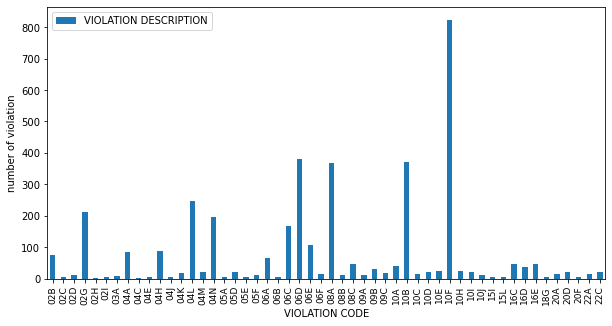

In [89]:
common_violation = common_violation.groupby('VIOLATION CODE').count().sort_values(by='VIOLATION CODE')
common_violation.plot(kind = 'bar',figsize=(10, 5))
plt.ylabel('number of violation')
#plt.legend(common_violation['VIOLATION DESCRIPTION'])
plt.xticks(fontsize=9)
#plt.bar(critical_flag,critical_flag["Neighborhood"])
plt.show()

In [90]:
# one hot encoding
brooklyn_code = pd.get_dummies(work_data[['VIOLATION CODE']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_code['Neighborhood'] = work_data['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_code.columns[-1]] + list(brooklyn_code.columns[:-1])
brooklyn_code = brooklyn_code[fixed_columns]

brooklyn_code.head()

,Neighborhood,02B,02C,02D,02G,02H,02I,03A,04A,04C,04E,04H,04J,04K,04L,04M,04N,05A,05D,05E,05F,06A,06B,06C,06D,06E,06F,08A,08B,08C,09A,09B,09C,10A,10B,10C,10D,10E,10F,10H,10I,10J,15I,15L,16C,16D,16E,18G,20A,20D,20F,22A,22C
0,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bay Ridge,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
brooklyn_code.shape

(3813, 53)

In [92]:
brooklyn_grouped = brooklyn_code.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,02B,02C,02D,02G,02H,02I,03A,04A,04C,04E,04H,04J,04K,04L,04M,04N,05A,05D,05E,05F,06A,06B,06C,06D,06E,06F,08A,08B,08C,09A,09B,09C,10A,10B,10C,10D,10E,10F,10H,10I,10J,15I,15L,16C,16D,16E,18G,20A,20D,20F,22A,22C
0,Bath Beach,0.024719,0.002247,0.004494,0.071910,0.000000,0.002247,0.0,0.031461,0.0000,0.000000,0.020225,0.002247,0.004494,0.067416,0.004494,0.026966,0.002247,0.006742,0.002247,0.002247,0.020225,0.002247,0.038202,0.107865,0.033708,0.002247,0.083146,0.002247,0.017978,0.000000,0.011236,0.006742,0.004494,0.094382,0.000000,0.002247,0.011236,0.229213,0.008989,0.004494,0.004494,0.000000,0.002247,0.011236,0.006742,0.008989,0.000000,0.000000,0.004494,0.002247,0.000000,0.002247
1,Bay Ridge,0.025000,0.000000,0.000000,0.050000,0.000000,0.000000,0.0,0.025000,0.0000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.150000,0.025000,0.050000,0.075000,0.025000,0.000000,0.050000,0.000000,0.000000,0.025000,0.100000,0.025000,0.000000,0.000000,0.150000,0.025000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bensonhurst,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Boerum Hill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.181818,0.181818,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brighton Beach,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Broadway Junction,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Carroll Gardens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,City Line,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [93]:
brooklyn_grouped.shape

(36, 53)

In [94]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Violation code','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
  Violation code  freq
0            10F  0.23
1            06D  0.11
2            10B  0.09
3            08A  0.08
4            04L  0.07


----Bay Ridge----
  Violation code  freq
0            10F  0.15
1            06D  0.15
2            10B  0.10
3            08A  0.08
4            04N  0.08


----Bensonhurst----
  Violation code  freq
0            10F   0.3
1            08A   0.1
2            04N   0.1
3            02G   0.1
4            06E   0.1


----Boerum Hill----
  Violation code  freq
0            08A  0.27
1            10F  0.18
2            04K  0.18
3            04L  0.18
4            04N  0.09


----Brighton Beach----
  Violation code  freq
0            10F   0.3
1            08A   0.1
2            04N   0.1
3            02G   0.1
4            06E   0.1


----Broadway Junction----
  Violation code  freq
0            10F   0.3
1            08A   0.1
2            04N   0.1
3            02G   0.1
4            06E   0.1


----Carroll Gardens----
  Violatio

I have listed the 10 most common violations by neighborhood

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [96]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Violation code'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Violation code'.format(ind+1))

# create a new dataframe
neighborhoods_violation_sorted = pd.DataFrame(columns=columns)
neighborhoods_violation_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_violation_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_violation_sorted.head(10)

,Neighborhood,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Bath Beach,10F,06D,10B,08A,02G,04L,06C,06E,04A,04N
1,Bay Ridge,06D,10F,10B,04N,08A,06F,02G,04H,06C,09A
2,Bensonhurst,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
3,Boerum Hill,08A,04K,10F,04L,04N,06D,02I,02D,02C,06C
4,Brighton Beach,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
5,Broadway Junction,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
6,Carroll Gardens,10F,06C,10B,22C,06B,06A,05F,05E,05D,05A
7,City Line,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
8,Clinton Hill,10F,06F,10H,02G,04H,04N,06C,06D,06E,08A
9,Cypress Hills,10F,08A,10B,06D,04N,04L,06C,02G,10A,04H


## cluster

I used an unsupervised K-means learning algorithm to group neighborhoods. The K-Means algorithm is one of the most common cluster methods of unsupervised learning.

In [97]:
brooklyn_data = work_data[["Neighborhood", "Neighborhood Latitude" ,"Neighborhood Longitude" ]].drop_duplicates().reset_index(drop=True)
brooklyn_data.rename(columns = {"Neighborhood Latitude":'Latitude',"Neighborhood Longitude":'Longitude'}, inplace = True)

In [98]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

In [99]:
# add clustering labels
neighborhoods_violation_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data
# merge toronto_grouped with brooklyn_datatoronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_violation_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Bay Ridge,40.625801,-74.030621,1,06D,10F,10B,04N,08A,06F,02G,04H,06C,09A
1,Bensonhurst,40.611009,-73.995180,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
2,Gravesend,40.595260,-73.973471,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
3,Brighton Beach,40.576825,-73.965094,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
4,Manhattan Terrace,40.614433,-73.957438,0,10F,10B,04H,06C,08A,04N,06E,02G,03A,02C


In [100]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'],brooklyn_merged['Neighborhood'],brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [101]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[0,3,4] + list(range(5, brooklyn_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Bensonhurst,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
1,Gravesend,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
2,Brighton Beach,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
3,Manhattan Terrace,0,10F,10B,04H,06C,08A,04N,06E,02G,03A,02C
4,Flatbush,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
5,Kensington,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
6,Gowanus,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
7,Starrett City,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C
8,Clinton Hill,0,10F,06F,10H,02G,04H,04N,06C,06D,06E,08A
9,Ocean Hill,0,10F,04H,06C,08A,10B,04N,06E,02G,03A,02C


Cluster 2

In [102]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1,brooklyn_merged.columns[[0,3,4] + list(range(5, brooklyn_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Bay Ridge,1,06D,10F,10B,04N,08A,06F,02G,04H,06C,09A
1,Cypress Hills,1,10F,08A,10B,06D,04N,04L,06C,02G,10A,04H
2,Bath Beach,1,10F,06D,10B,08A,02G,04L,06C,06E,04A,04N
3,Prospect Park South,1,10F,08A,10B,06D,04N,04L,06C,02G,10A,04H
4,Georgetown,1,10F,10B,08A,04N,02G,10I,06D,06C,04H,06A
5,Fort Hamilton,1,10F,08A,10B,06D,04N,04L,06C,02G,10A,04H
6,Ditmas Park,1,10F,06D,10B,08A,02G,04L,06C,06E,04A,04N
7,Wingate,1,10F,08A,10B,06D,04N,04L,06C,02G,10A,16E
8,Homecrest,1,10F,06D,10B,08A,02G,04L,06C,06E,04A,04N
9,Sunset Park,1,10F,06D,04A,08A,04L,05D,04C,02B,02G,03A


Cluster 3

In [103]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2 , brooklyn_merged.columns[[0,3,4] + list(range(5, brooklyn_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Vinegar Hill,2,03A,10F,10B,22C,06C,06B,06A,05F,05E,05D
1,Dumbo,2,03A,10F,10B,22C,06C,06B,06A,05F,05E,05D


Cluster 4

In [104]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3,brooklyn_merged.columns[[0,3,4] + list(range(5, brooklyn_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,Prospect Heights,3,06C,20A,10A,04H,06D,10F,04L,06B,06A,05F
1,Williamsburg,3,06C,20A,10A,04H,06D,10F,04L,06B,06A,05F
2,South Side,3,06C,06A,20A,10A,04H,06D,10F,04L,06B,05F


Cluster 5

In [105]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4,brooklyn_merged.columns[[0,3,4] + list(range(5, brooklyn_merged.shape[1]))]].reset_index(drop=True)

,Neighborhood,Cluster Labels,1st Most Violation code,2nd Most Violation code,3rd Most Violation code,4th Most Violation code,5th Most Violation code,6th Most Violation code,7th Most Violation code,8th Most Violation code,9th Most Violation code,10th Most Violation code
0,North Side,4,10J,10F,06A,10B,06D,22C,04K,06B,05F,05E
